In [1]:
from google.colab import runtime
#runtime.unassign()

###Install PyTorch Lightning package

In [1]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

###Link to Google Drive for dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Building the Vocabulary Document

In [3]:
input_files = ['/content/drive/MyDrive/CROHME2019/crohme2019_train.txt',
'/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt',
'/content/drive/MyDrive/CROHME2019/crohme2019_test.txt']

vocab = set()

for input_file in input_files:
    for line in open(input_file).readlines():
        #Check if all entries are formatted properly (Doc name + Target Output), and add each symbol as a token to the vocab set
        if len(line.strip().split('\t')) == 2:
            vocab.update(line.strip().split('\t')[1].split())
print(vocab)

{'-', '\\}', 'f', 'R', 'G', '!', 'F', '\\pm', '1', '\\infty', 'q', 'T', 'Above', '7', 'H', 'C', '\\alpha', 's', 'V', 'I', '\\sum', '6', 'r', 'Below', 'k', 'NoRel', 'n', '\\tan', 'p', '0', '\\pi', '=', 'S', '\\int', '\\theta', '\\forall', 'E', '\\neq', '\\Delta', 'Inside', '\\div', 'h', '5', 'd', '\\beta', 'y', 'u', '\\{', '\\rightarrow', 'c', '\\log', 'Sub', 'N', 'b', '2', '.', '\\lambda', '+', '8', 'g', 'COMMA', '(', '\\sqrt', '[', 'v', 'm', '\\prime', 'i', 'Y', 'B', 'j', 'a', 'Sup', '\\geq', 'l', 'o', '\\ldots', '\\exists', '\\sin', '/', '\\in', ')', '\\times', '3', 'e', 'L', '\\lt', 'x', '\\leq', '\\gt', 'Right', '9', 'P', ']', '|', '\\gamma', 'M', '\\cos', '\\phi', 'X', 'A', '\\lim', 'z', '\\sigma', 't', '\\mu', 'w', '4'}


In [4]:
#vocab_syms only contains the symbols
vocab_syms = [v for v in vocab if v not in ['Above', 'Below', 'Inside', 'NoRel', 'Right', 'Sub', 'Sup']]

In [5]:
#Add these symbol tokens to the vocab doc, followed by the relation tokens
with open('crohme_vocab.txt', 'w') as f:
    f.writelines([c + '\n' for c in sorted(vocab_syms)])
    f.writelines([c + '\n' for c in ['Above', 'Below', 'Inside', 'NoRel', 'Right', 'Sub', 'Sup']])


In [6]:
class Vocab(object):
    def __init__(self, vocab_file=None):
        self.word2index = {}
        self.index2word = {}

        if vocab_file:
            self.load_vocab(vocab_file)
    #Add index values to each symbol token in the vocab file
    def load_vocab(self, vocab_file):
        # load vocab from file
        with open(vocab_file, 'r') as f:
            for i, line in enumerate(f):
                word = line.strip()
                self.word2index[word] = i
                self.index2word[i] = word
        # add blank word
        self.word2index['<blank>'] = len(self.word2index)
        self.index2word[self.word2index['<blank>']] = '<blank>'


In [7]:
#Check the vocab file
vocab = Vocab(vocab_file = 'crohme_vocab.txt')
vocab.index2word

{0: '!',
 1: '(',
 2: ')',
 3: '+',
 4: '-',
 5: '.',
 6: '/',
 7: '0',
 8: '1',
 9: '2',
 10: '3',
 11: '4',
 12: '5',
 13: '6',
 14: '7',
 15: '8',
 16: '9',
 17: '=',
 18: 'A',
 19: 'B',
 20: 'C',
 21: 'COMMA',
 22: 'E',
 23: 'F',
 24: 'G',
 25: 'H',
 26: 'I',
 27: 'L',
 28: 'M',
 29: 'N',
 30: 'P',
 31: 'R',
 32: 'S',
 33: 'T',
 34: 'V',
 35: 'X',
 36: 'Y',
 37: '[',
 38: '\\Delta',
 39: '\\alpha',
 40: '\\beta',
 41: '\\cos',
 42: '\\div',
 43: '\\exists',
 44: '\\forall',
 45: '\\gamma',
 46: '\\geq',
 47: '\\gt',
 48: '\\in',
 49: '\\infty',
 50: '\\int',
 51: '\\lambda',
 52: '\\ldots',
 53: '\\leq',
 54: '\\lim',
 55: '\\log',
 56: '\\lt',
 57: '\\mu',
 58: '\\neq',
 59: '\\phi',
 60: '\\pi',
 61: '\\pm',
 62: '\\prime',
 63: '\\rightarrow',
 64: '\\sigma',
 65: '\\sin',
 66: '\\sqrt',
 67: '\\sum',
 68: '\\tan',
 69: '\\theta',
 70: '\\times',
 71: '\\{',
 72: '\\}',
 73: ']',
 74: 'a',
 75: 'b',
 76: 'c',
 77: 'd',
 78: 'e',
 79: 'f',
 80: 'g',
 81: 'h',
 82: 'i',
 83: 'j',


In [8]:
#Test vocab against a random example
vocab = Vocab('crohme_vocab.txt')
input = '- Right \\sqrt Inside 2'.split()
output = [vocab.word2index[word] for word in input]
output
assert output == [4, 105, 66, 103, 9]

###Classes to handle inkML files using XML namespaces (load filename, stroke data, segmentation and associated labels)

In [9]:
import numpy as np
import xml.etree.ElementTree as ET

class Segment(object): #Class to reprsent a Segment compound of strokes (id) with an id and label
    __slots__ = ('id', 'label' ,'strId')
    def __init__(self, *args):
        if len(args) == 3:
            self.id = args[0]
            self.label = args[1]
            self.strId = args[2]
        else:
            self.id = "none"
            self.label = ""
            self.strId = set([])

class Inkml(object): #Class to read an INKML file and extract strokes, segments and labels
    __slots__ = ('fileName', 'strokes', 'strkOrder','segments','truth','UI')

    NS = {'ns': 'http://www.w3.org/2003/InkML', 'xml': 'http://www.w3.org/XML/1998/namespace'}

    def __init__(self,*args):
        self.fileName = None
        self.strokes = {}
        self.strkOrder = []
        self.segments = {}
        self.truth = ""
        self.UI = ""
        if len(args) == 1:
            self.fileName = args[0]
            self.loadFromFile()

    #Build the right tag or element name with namespace
    def fixNS(self,ns,att):
        return '{'+Inkml.NS[ns]+'}'+att

    #Load the ink from an InkML file, handling both standard and namespaced formats
    def loadFromFile(self):
            tree = ET.parse(self.fileName)
            root = tree.getroot()

    # Extract annotations (ground truth expressions)
            for info in root.findall('.//annotation'):
                if 'type' in info.attrib:
                    if info.attrib['type'] == 'truth':
                        self.truth = info.text.strip()
                    if info.attrib['type'] == 'UI':
                        self.UI = info.text.strip()

    # Handle both namespaced and non-namespaced formats
            for strk in root.findall('.//{http://www.w3.org/2003/InkML}trace'):
                trace_id = strk.attrib.get('id', strk.attrib.get('{http://www.w3.org/XML/1998/namespace}id', str(len(self.strokes))))

    # Ensure stroke data is valid
                if strk.text:
                    self.strokes[trace_id] = strk.text.strip()
                    self.strkOrder.append(trace_id)


    def getTraces(self, height = 256):
        #Net ink traces from the inkml file (useful for visualizing)
        traces_array = [np.array([p.strip().split()
            for p in self.strokes[id].split(',')], dtype='float')
              for id in self.strkOrder ]
        #Normalize the dimensions of the representation to fit into a box of fixed dimensions ()
        ratio = height / ((np.concatenate(traces_array, 0).max(0) - np.concatenate(traces_array, 0).min(0))[1] + 1e-6)
        return [(trace * ratio).astype(int).tolist() for trace in traces_array]

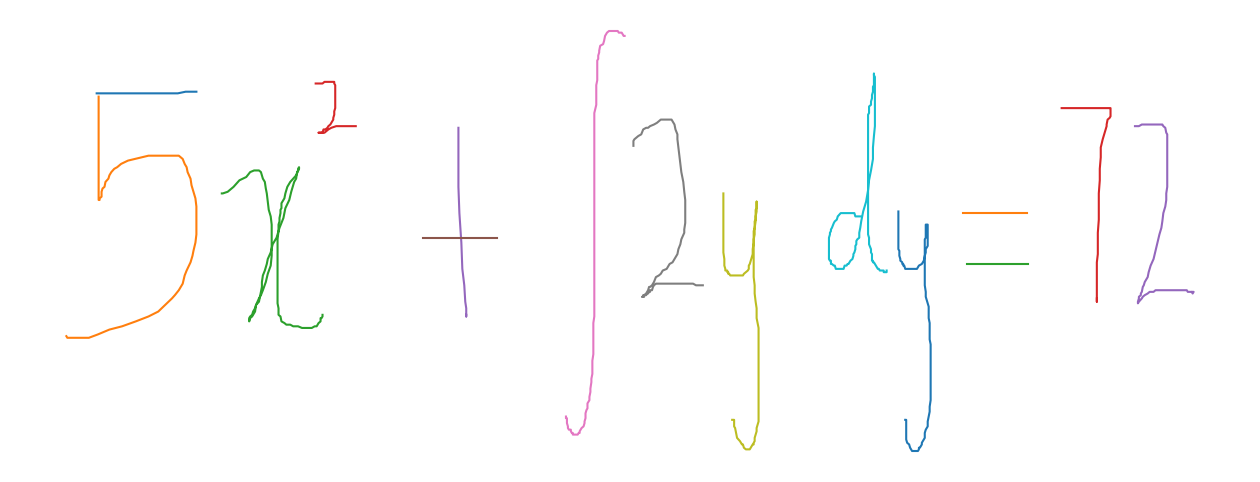

In [10]:
import matplotlib.pyplot as plt

#Function to visualize inkML files
def visualize_inkml(ink_obj: Inkml):
    ink = ink_obj

    plt.figure(figsize=(16, 6))
    plt.axis("off")
    for trace in ink.getTraces():
        trace_arr = np.array(trace)
        plt.plot(trace_arr[:, 0], -trace_arr[:, 1])  #Invert y coordinate to visualize, as origin is at top left of inkML file


path = '/content/sample1.inkml'
ink = Inkml(path)
visualize_inkml(ink)

In [11]:
#Ink object from an InkML file
ink = Inkml('/content/drive/MyDrive/CROHME2019/crohme2019/crohme2019/valid/18_em_0.inkml')

#Get dimesnion of traces from the ink object
[np.array(trace).shape for trace in ink.getTraces()]

[(525, 2),
 (113, 2),
 (118, 2),
 (328, 2),
 (350, 2),
 (96, 2),
 (130, 2),
 (115, 2),
 (293, 2),
 (304, 2),
 (111, 2),
 (133, 2),
 (265, 2),
 (329, 2),
 (103, 2),
 (132, 2)]

###Building the Dataset Class
- Below implementation is for testing only, actual implementation is CROHME(Dataset)

In [12]:
#Testing Dataset class for structure
from torch.utils.data import Dataset
import os
import xml.etree.ElementTree as ET

class InkmlDataset(Dataset):
    def __init__(self, annotation, root_dir, vocab):
        self.annotation = annotation
        self.root_dir = root_dir
        self.vocab = vocab

        # Load annotations
        self.ink_paths = []
        self.labels = []

        # Read annotation file and populate self.ink_paths and self.labels
        with open(self.annotation, 'r') as f:
            for line in f:
                parts = line.strip().split(',')
                if len(parts) == 2:
                    ink_file, label = parts
                    self.ink_paths.append(os.path.join(self.root_dir, ink_file))
                    self.labels.append(label)

    def __len__(self):
        # Return the number of samples in the dataset
        return len(self.labels)

    def __getitem__(self, idx):
        # Return the idx-th sample in the dataset
        if idx >= len(self.labels):
            raise IndexError("Index out of range")

        inkfile = self.ink_paths[idx]
        label = self.labels[idx]

        # Read inkml file to extract traces
        tree = ET.parse(inkfile)
        root = tree.getroot()
        traces = []
        for trace in root.findall('trace'):
            points = []
            for point in trace.text.strip().split(','):
                x, y = map(float, point.split(' '))
                points.append((x, y))
            traces.append(points)

        # Feature extraction
        feature = self.extract_features(traces)

        # Convert label tokens into vocab indexes
        label_indexes = [self.vocab[token] for token in label.split()]

        input_len = len(feature)
        label_len = len(label_indexes)

        return feature, label_indexes, input_len, label_len

In [13]:
#Function to remove any duplicate coordinates in the trace
def remove_duplicate(trace):
    if not trace:
        return []

    new_trace = [trace[0]]  # Start with the first point
    for point in trace[1:]:
        if point != new_trace[-1]:  # Add to new_trace if not duplicate of the last point
            new_trace.append(point)

    return new_trace

In [14]:
#Testing the remove_duplicate() function
ink = Inkml('/content/drive/MyDrive/CROHME2019/crohme2019/crohme2019/valid/18_em_0.inkml')
traces = ink.getTraces()
traces = [remove_duplicate(trace) for trace in traces]

assert list(map(len,traces)) == [82, 16, 21, 78, 82, 15, 18, 18, 28, 58, 15, 19, 56, 70, 18, 21]

In [15]:
#Function to calculate the normalised stroke gradients
import numpy as np

def feature_extraction(traces):
    features = []
    last_point = None  # Variable to keep track of the last point in the current stroke

    for stroke in traces:
        if len(stroke) == 0:
            continue  # Skip empty strokes

        # Handle the pen-up event (last point of the previous stroke to the first point of the current stroke)
        if last_point is not None:
            x1, y1, *_ = last_point
            x2, y2, *_ = stroke[0]
            dx = x2 - x1
            dy = y2 - y1
            distance = (dx**2 + dy**2)**0.5
            pen_up = 1  # Pen-up event

            # Only append if distance is non-zero
            if distance > 0:
                features.append([dx / distance, dy / distance, distance, pen_up])

        # Process points within the current stroke
        for i in range(1, len(stroke)):
            x1, y1, *_ = stroke[i - 1]
            x2, y2, *_ = stroke[i]
            dx = x2 - x1
            dy = y2 - y1
            distance = (dx**2 + dy**2)**0.5
            pen_up = 0  # Pen-down event

            # Only append if distance is non-zero (ie. it is a valid stroke or a jump to next character)
            if distance > 0:
                features.append([dx / distance, dy / distance, distance, pen_up])

        # Update last_point to the last point of the current stroke
        last_point = stroke[-1]

    return np.array(features)


In [16]:
#Test feature_extraction function
ink = Inkml('/content/drive/MyDrive/CROHME2019/crohme2019/crohme2019/valid/18_em_0.inkml')
traces = ink.getTraces()
traces = [remove_duplicate(trace) for trace in traces]
feature = feature_extraction(traces)

#print(len(feature))
import numpy.testing as npt
assert feature.shape == (614, 4)
npt.assert_array_equal(np.where(feature[:,3] == 1)[0], np.array([ 81,  97, 118, 196, 278, 293, 311, 329, 357, 415, 430, 449, 505,
       575, 593]))

In [17]:
#Dataset class for loading the dataset files for the model (train, validation and test) and pre-processing the files

from torch.utils.data import Dataset
import os
import xml.etree.ElementTree as ET
import numpy as np
import math
import torch

class CROHME(Dataset):
    def __init__(self, annotation, root_dir, vocab):
        self.annotation = annotation
        self.root_dir = root_dir
        self.vocab = vocab
        self.ink_paths = []
        self.labels = []

        with open(self.annotation, 'r') as f:
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) == 2: #Make sure the file is of the format [Filename, labels]
                    ink_file, label = parts
                    full_path = os.path.join(self.root_dir, ink_file)
                    self.ink_paths.append(full_path)
                    self.labels.append(label)

        print(f"Total samples loaded: {len(self.ink_paths)}")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        inkfile = self.ink_paths[idx]
        label = self.labels[idx]

        ink = Inkml(inkfile)

        #Get traces from the ink object
        traces = ink.getTraces()

        processed_traces = [self.remove_duplicate(trace) for trace in traces]
        feature = feature_extraction(processed_traces)

        if not feature.size: #Check if any features are extracted, if not, return empty tensors and length = 0
            print(f"No features extracted from {inkfile}.")
            return torch.tensor([]), torch.tensor([]), 0, 0

        label_indexes = [self.vocab.word2index.get(token, self.vocab.word2index.get('<unk>', 0)) for token in label.split(' ')]

        feature_tensor = torch.tensor(feature, dtype=torch.float)
        label_tensor = torch.tensor(label_indexes, dtype=torch.long)

        return feature_tensor, label_tensor, len(feature), len(label_indexes)

    def remove_duplicate(self, trace): #Get rid of duplicate traces
        new_trace = [trace[0]] if trace else []
        for point in trace[1:]:
            if point != new_trace[-1]:
                new_trace.append(point)
        return new_trace

In [18]:
#Test dataset class against datatypes and label values
dataset = CROHME(annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt', root_dir='/content/drive/MyDrive/CROHME2019/crohme2019', vocab=Vocab('crohme_vocab.txt'))
feature, label, input_len, label_len = dataset.__getitem__(0)

import numpy.testing as npt

assert type(feature) == torch.Tensor
assert type(label) == torch.Tensor
assert feature.shape == (231, 4)
npt.assert_array_equal(label, np.array([59, 105, 1, 105, 59, 105, 1, 105, 87, 105, 2, 105, 2]))
assert input_len == 231
assert label_len == 13

Total samples loaded: 986


In [19]:
import torch

#Function to batch-process samples for feeding to the model
def collate_fn(batch):
    # Sort the batch in the descending order of input lengths
    batch.sort(key=lambda x: x[2], reverse=True)

    # Separate the batch into its components
    features, labels, input_lens, label_lens = zip(*batch)

    # Pad the sequences with 0 values, using clone().detach() to avoid the warning
    features_padded = torch.nn.utils.rnn.pad_sequence([f.clone().detach() for f in features], batch_first=True, padding_value=0)
    labels_padded = torch.nn.utils.rnn.pad_sequence([l.clone().detach() for l in labels], batch_first=True, padding_value=-1)  # Assuming -1 is an ignore_index

    # Convert lengths to tensor
    input_lens = torch.tensor(input_lens)
    label_lens = torch.tensor(label_lens)

    return features_padded, labels_padded, input_lens, label_lens

In [20]:
#Test collate function
features, labels, input_lens, label_lens = collate_fn([dataset[0], dataset[1]])

import numpy.testing as npt

assert type(input_lens) == torch.Tensor
assert type(label_lens) == torch.Tensor

assert features.shape == (2, 231, 4)
assert labels.shape == (2, 13)
npt.assert_array_equal(input_lens.numpy(), np.array([231, 102]))
npt.assert_array_equal(label_lens, np.array([13, 5]))

In [21]:
#Test collate function with data loader
from torch.utils.data import DataLoader
data_loader = DataLoader(dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)

features, labels, input_lens, label_lens = next(iter(data_loader))
assert features.shape == (2, 231, 4)
assert labels.shape == (2, 13)
npt.assert_array_equal(input_lens.numpy(), np.array([231, 102]))
npt.assert_array_equal(label_lens, np.array([13, 5]))

###Data Module
- Manages dataset (train, validate and test) for training and testing the model
- Follows PyTorch Lightning's Datamodule structure

In [22]:
import pytorch_lightning as pl
class CROHMEDatamodule(pl.LightningDataModule):
    def __init__(self, root_dir, train_annotation, validation_annotation, test_annotation, vocab_file, batch_size, num_workers):
        super().__init__()
        self.root_dir = root_dir
        self.batch_size = batch_size
        self.train_annotation = train_annotation
        self.validation_annotation = validation_annotation
        self.test_annotation = test_annotation
        self.vocab = Vocab(vocab_file)
        self.num_workers = num_workers

    def setup(self, stage: str):
        self.train_dataset = CROHME(self.train_annotation, self.root_dir, self.vocab)
        self.val_dataset = CROHME(self.validation_annotation, self.root_dir, self.vocab)
        self.test_dataset = CROHME(self.test_annotation, self.root_dir, self.vocab)

    def train_dataloader(self): #Shuffle set to true to avoid overfitting on training set
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, collate_fn=collate_fn)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False, collate_fn=collate_fn)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False, collate_fn=collate_fn)

In [23]:
import torch.nn as nn

#Initialising the LSTM Model
class LSTM_TemporalClassification(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_TemporalClassification, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply by 2 for bidirectional
        self.vocab = Vocab('crohme_vocab.txt')

    def forward(self, x):
        # Forward propagate LSTM
        out, _ = self.lstm(x)  # out: tensor of shape (batch_size, seq_length, hidden_size*2)

        # Apply the fully connected layer to each time step
        out = self.fc(out)  # Now out: tensor of shape (batch_size, seq_length, num_classes)

        return out

In [24]:
#Test the LSTM model
model = LSTM_TemporalClassification(4, 128, 3, 109)
assert model.forward(torch.rand((10, 100, 4))).shape == (10, 100, 109)
print("Model test passed!")

Model test passed!


In [25]:
#Example implementation of a Classifier Model
from torchmetrics.functional import accuracy

class ClassificationTask(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.model(x)
        loss = F.cross_entropy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, acc = self._shared_eval_step(batch, batch_idx)
        metrics = {"val_acc": acc, "val_loss": loss}
        self.log_dict(metrics)
        return metrics

    def test_step(self, batch, batch_idx):
        loss, acc = self._shared_eval_step(batch, batch_idx)
        metrics = {"test_acc": acc, "test_loss": loss}
        self.log_dict(metrics)
        return metrics

    def _shared_eval_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.model(x)
        loss = F.cross_entropy(y_hat, y)
        acc = accuracy(y_hat, y)
        return loss, acc

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=0.02)

###Model Training


In [26]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F

class MathOnlineModel(pl.LightningModule):
    def __init__(self, lr=0.001, input_size=4, output_size=109, hidden_size=128, num_layers=3, decoder=None):
        super().__init__()
        self.model = LSTM_TemporalClassification(input_size, hidden_size, num_layers, output_size)
        self.criterion = nn.CTCLoss(blank=output_size - 1)
        self.lr = lr
        self.decoder = decoder

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y, input_lengths, target_lengths = batch
        y_hat = self.model(x)
        y_hat = y_hat.permute(1, 0, 2)
        loss = self.criterion(y_hat.log_softmax(2), y, input_lengths, target_lengths)
        self.log('train_loss', loss, prog_bar=True, on_step=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y, input_lengths, target_lengths = batch
        y_hat = self.model(x)
        y_hat = y_hat.permute(1, 0, 2)
        loss = self.criterion(y_hat.log_softmax(2), y, input_lengths, target_lengths)
        self.log('val_loss', loss, prog_bar=True, on_step=False, on_epoch=True)
        return {'val_loss': loss}

    def test_step(self, batch, batch_idx):
        x, y, input_lengths, target_lengths = batch
        y_hat = self.model(x)
        y_hat = y_hat.permute(1, 0, 2)
        loss = self.criterion(y_hat.log_softmax(2), y, input_lengths, target_lengths)
        self.log('test_loss', loss, prog_bar=True, on_step=False, on_epoch=True)
        return {'test_loss': loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)

In [27]:
'''from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer

#Define the trainer
trainer = Trainer(
    callbacks=[
        LearningRateMonitor(logging_interval='step'),
        ModelCheckpoint(filename='{epoch}-{val_loss:.4f}', save_top_k=5, monitor='val_loss', mode='min'),
    ],
    logger=TensorBoardLogger('lightning_logs'),
    check_val_every_n_epoch=1,
    fast_dev_run=False,
    default_root_dir='checkpoint',
    deterministic=False,
    max_epochs=10,
    log_every_n_steps=10,
    devices=1,
)

#Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MathOnlineModel().to(device)
#model = MathOnlineModel.load_from_checkpoint(
    #'')

#Initialize the data module
dm = CROHMEDatamodule(
    root_dir='/content/drive/MyDrive/CROHME2019/crohme2019',
    train_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_train.txt',
    validation_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt',
    test_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_test.txt',
    vocab_file='crohme_vocab.txt',
    batch_size=8,
    num_workers=4
)

#Fit the model
trainer.fit(model, datamodule = dm)'''

'from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor\nfrom pytorch_lightning.loggers import TensorBoardLogger\nfrom pytorch_lightning import Trainer\n\n#Define the trainer\ntrainer = Trainer(\n    callbacks=[\n        LearningRateMonitor(logging_interval=\'step\'),\n        ModelCheckpoint(filename=\'{epoch}-{val_loss:.4f}\', save_top_k=5, monitor=\'val_loss\', mode=\'min\'),\n    ],\n    logger=TensorBoardLogger(\'lightning_logs\'),\n    check_val_every_n_epoch=1,\n    fast_dev_run=False,\n    default_root_dir=\'checkpoint\',\n    deterministic=False,\n    max_epochs=10,\n    log_every_n_steps=10,\n    devices=1,\n)\n\n#Initialize the model\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nmodel = MathOnlineModel().to(device)\n#model = MathOnlineModel.load_from_checkpoint(\n    #\'\')\n\n#Initialize the data module\ndm = CROHMEDatamodule(\n    root_dir=\'/content/drive/MyDrive/CROHME2019/crohme2019\',\n    train_annotation=\'/content/driv

In [28]:
'''from pytorch_lightning import Trainer

#Run test on validation dataset with best val_loss model
trainer = Trainer(
    devices = 1,
)

# Load the model from a checkpoint
model = MathOnlineModel.load_from_checkpoint("/content/epoch=9-val_loss=0.6140.ckpt")

# Initialize the data module
dm = CROHMEDatamodule(
    root_dir='/content/drive/MyDrive/CROHME2019/crohme2019',
    train_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_train.txt',
    validation_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt',
    test_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_test.txt',
    vocab_file='crohme_vocab.txt',
    batch_size=8,
    num_workers=4
)

# Test the model
trainer.test(model, datamodule=dm)'''

'from pytorch_lightning import Trainer\n\n#Run test on validation dataset with best val_loss model\ntrainer = Trainer(\n    devices = 1,\n)\n\n# Load the model from a checkpoint\nmodel = MathOnlineModel.load_from_checkpoint("/content/epoch=9-val_loss=0.6140.ckpt")\n\n# Initialize the data module\ndm = CROHMEDatamodule(\n    root_dir=\'/content/drive/MyDrive/CROHME2019/crohme2019\',\n    train_annotation=\'/content/drive/MyDrive/CROHME2019/crohme2019_train.txt\',\n    validation_annotation=\'/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt\',\n    test_annotation=\'/content/drive/MyDrive/CROHME2019/crohme2019_test.txt\',\n    vocab_file=\'crohme_vocab.txt\',\n    batch_size=8,\n    num_workers=4\n)\n\n# Test the model\ntrainer.test(model, datamodule=dm)'

In [29]:
from typing import List
import torch

#Decoder class using Greedy Decoder
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, vocab):
        super().__init__()
        self.vocab = vocab
        self.blank = vocab.word2index['<blank>']

    #Given a sequence emission (logits tensor) over labels, get the best decoding
    def forward(self, emission: torch.Tensor) -> List[str]:

        indices = torch.argmax(emission, dim=-1) #Get most probable indices for each time step
        indices = [indices[0].item()] + [indices[i].item() for i in range(1, indices.shape[0]) if indices[i] != indices[i-1]] #Remove duplicates
        indices = [idx for idx in indices if idx != self.blank] #Remove blank values
        output_seq_list = [self.vocab.index2word[idx] for idx in indices] #Convert indices to decoded symbols

        return output_seq_list

In [30]:
#Load the best val_loss model to test greedy decoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MathOnlineModel.load_from_checkpoint('/content/epoch=9-val_loss=0.6140.ckpt')
model = model.to(device)
model.eval()

dataset = CROHME(annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt', root_dir='/content/drive/MyDrive/CROHME2019/crohme2019', vocab=Vocab('crohme_vocab.txt'))
feature, label, input_len, label_len = dataset.__getitem__(0)
feature = feature.to(device)  # Move feature to the same device as the model

greedy_decoder = GreedyCTCDecoder(vocab)

# Run model forward with feature --> output
output = model(feature.unsqueeze(0))  #Add batch dimension

# Run greedy decoder
decoded = greedy_decoder.forward(output.squeeze(0))  #Remove batch dimension if added earlier
print(decoded)

Total samples loaded: 986
['x', 'Right', '(', 'Right', 'x', 'Right', '(', 'Sup', 'n', 'Right', ')', 'Right', ')']


In [31]:
#from torchmetrics.functional.text.helper import _LevenshteinEditDistance

#Function to calculate Levenshtein Edit Distance
def edit_distance(pred_seq, label_seq):

    # Initialize matrix of zeros
    m, n = len(pred_seq) + 1, len(label_seq) + 1
    dp = [[0] * n for _ in range(m)]

    # Initialize first column and first row of the matrix
    for i in range(m):
        dp[i][0] = i
    for j in range(n):
        dp[0][j] = j

    # Compute edit distance
    for i in range(1, m):
        for j in range(1, n):
            if pred_seq[i-1] == label_seq[j-1]:
                dp[i][j] = dp[i-1][j-1]  # No operation needed
            else:
                dp[i][j] = 1 + min(dp[i-1][j],    # Deletion
                                   dp[i][j-1],    # Insertion
                                   dp[i-1][j-1])  # Substitution

    #Edit distance is the value in the bottom right corner of the matrix
    distance = dp[-1][-1]
    return distance

#Test the function
assert edit_distance(['\\phi',
  'Right',
  '(',
  'Right',
  '0',
  'Right',
  '(',
  'Right',
  'n',
  'Right',
  ')',
  'Right',
  ')'],
 ['\\phi',
  'Right',
  '(',
  'Right',
  '\\phi',
  'Right',
  '(',
  'Right',
  'n',
  'Right',
  ')',
  'Right',
  ')']) == 1

In [32]:
import pytorch_lightning as pl
import torch
#from torchmetrics.functional.text.helper import _LevenshteinEditDistance as _LE_distance

#Revised implementation of model with Word Error Rate added in
class MathOnlineModel(pl.LightningModule):
    def __init__(self, lr=0.001, input_size=4, output_size=109, hidden_size=128, num_layers = 3, decoder=None):
        super().__init__()
        self.model = LSTM_TemporalClassification(input_size, hidden_size, num_layers, output_size)
        self.criterion = nn.CTCLoss(blank=output_size - 1)
        self.lr = lr
        self.decoder = decoder
        self.vocab=Vocab('/content/drive/MyDrive/CROHME2019/crohme_vocab.txt')



    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y, x_lens, y_lens = batch

        #Forward pass
        logits = self.model(x)
        log_probs = torch.nn.functional.log_softmax(logits, dim=2)

        #Calculate loss
        y_hat = self.model(x)
        y_hat = y_hat.permute(1, 0, 2)
        loss = self.criterion(y_hat.log_softmax(2), y, x_lens, y_lens)

        # Calculate total edit distance
        total_edits = 0
        total_lens = 0
        for i in range(len(y)):
            with torch.no_grad():
                decoded = self.decoder(log_probs[i])
            pred_seq = decoded
            label_seq = [self.vocab.index2word[y[i][j].item()] for j in range(y_lens[i])]  # Convert indices to words
            edit_distances = edit_distance(pred_seq, label_seq)

            # Calculate edit distance with every loop
            total_edits += edit_distances
            total_lens += y_lens[i]

        self.log('train_loss', loss, prog_bar=True, on_step=True, on_epoch=True)
        self.log('train_wer', total_edits / total_lens, prog_bar=True, on_step=True, on_epoch=True)
        return loss



    def validation_step(self, batch, batch_idx):
        x, y, x_lens, y_lens = batch

        #Forward pass
        logits = self.model(x)
        log_probs = torch.nn.functional.log_softmax(logits, dim=-1)

        #Calculate loss
        y_hat = self.model(x)
        y_hat = y_hat.permute(1, 0, 2)
        loss = self.criterion(y_hat.log_softmax(2), y, x_lens, y_lens)

        # Calculate total edit distance
        total_edits = 0
        total_lens = 0
        for i in range(len(y)):
            with torch.no_grad():
                decoded = self.decoder(log_probs[i])
            pred_seq = decoded
            label_seq = [self.vocab.index2word[y[i][j].item()] for j in range(y_lens[i])]  # Convert indices to words
            edit_distances = edit_distance(pred_seq, label_seq)

            # Calculate edit distance with every loop
            total_edits += edit_distances
            total_lens += y_lens[i]

        self.log('val_loss', loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log('val_wer', total_edits / total_lens, prog_bar=True, on_step=False, on_epoch=True)
        return loss



    def test_step(self, batch, batch_idx):
        x, y, x_lens, y_lens = batch

        #Forward pass
        logits = self.model(x)
        log_probs = torch.nn.functional.log_softmax(logits, dim=-1)

        #Calculate loss
        y_hat = self.model(x)
        y_hat = y_hat.permute(1, 0, 2)
        loss = self.criterion(y_hat.log_softmax(2), y, x_lens, y_lens)

        # Calculate total edit distance
        total_edits = 0
        total_lens = 0
        for i in range(len(y)):
            with torch.no_grad():
                decoded = self.decoder(log_probs[i])
            pred_seq = decoded
            label_seq = [self.vocab.index2word[y[i][j].item()] for j in range(y_lens[i])]  # Convert indices to words
            edit_distances = edit_distance(pred_seq, label_seq)

            #Calculate edit distance with every loop
            total_edits += edit_distances
            total_lens += y_lens[i]

        self.log('test_loss', loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log('test_wer', total_edits / total_lens, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)

In [33]:
'''from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer

#Train the model with word error rate being minimized
trainer = Trainer(
    callbacks = [
        LearningRateMonitor(logging_interval='step'),
        ModelCheckpoint(filename='{epoch}-{val_wer:.4f}', save_top_k=5, monitor='val_wer', mode='min'),
    ],
    logger = TensorBoardLogger('lightning_logs'),
    check_val_every_n_epoch=1,
    fast_dev_run=False,
    default_root_dir='checkpoint',
    deterministic=False,
    max_epochs=10,
    log_every_n_steps=50,
    devices = 1,
)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MathOnlineModel.load_from_checkpoint('/content/epoch=9-val_loss=0.6140.ckpt', decoder=GreedyCTCDecoder(dataset.vocab)).to(device)
model = model.to(device)

dm = CROHMEDatamodule(root_dir='/content/drive/MyDrive/CROHME2019/crohme2019',
                       train_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_train.txt',
                       validation_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt',
                       test_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_test.txt',
                       vocab_file='crohme_vocab.txt',
                       batch_size=32,
                      num_workers=4
                     )

trainer.fit(model, dm)'''



'from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor\nfrom pytorch_lightning.loggers import TensorBoardLogger\nfrom pytorch_lightning import Trainer\n\n#Train the model with word error rate being minimized\ntrainer = Trainer(\n    callbacks = [\n        LearningRateMonitor(logging_interval=\'step\'),\n        ModelCheckpoint(filename=\'{epoch}-{val_wer:.4f}\', save_top_k=5, monitor=\'val_wer\', mode=\'min\'),\n    ],\n    logger = TensorBoardLogger(\'lightning_logs\'),\n    check_val_every_n_epoch=1,\n    fast_dev_run=False,\n    default_root_dir=\'checkpoint\',\n    deterministic=False,\n    max_epochs=10,\n    log_every_n_steps=50,\n    devices = 1,\n)\n\n# Initialize the model\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nmodel = MathOnlineModel.load_from_checkpoint(\'/content/epoch=9-val_loss=0.6140.ckpt\', decoder=GreedyCTCDecoder(dataset.vocab)).to(device)\nmodel = model.to(device)\n\ndm = CROHMEDatamodule(root_dir=\'/content/dri

In [34]:
#TESTING ON VALIDATION SET
#Load the best val_wer model

'''from pytorch_lightning import Trainer

trainer = Trainer(
    devices = 1,
)

# Load the model from a checkpoint
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MathOnlineModel.load_from_checkpoint(
    '/content/epoch=9-val_wer=0.1221.ckpt',
    decoder=GreedyCTCDecoder(dataset.vocab)
)
model = model.to(device)

# Initialize the data module
dm = CROHMEDatamodule(root_dir='/content/drive/MyDrive/CROHME2019/crohme2019',
                       train_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_train.txt',
                       validation_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt',
                       test_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_test.txt',
                       vocab_file='crohme_vocab.txt',
                       batch_size=32,
                      num_workers=4
                     )

# Test the model
trainer.test(model, datamodule=dm)'''

'from pytorch_lightning import Trainer\n\ntrainer = Trainer(\n    devices = 1,\n)\n\n# Load the model from a checkpoint\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nmodel = MathOnlineModel.load_from_checkpoint(\n    \'/content/epoch=9-val_wer=0.1221.ckpt\',\n    decoder=GreedyCTCDecoder(dataset.vocab)\n)\nmodel = model.to(device)\n\n# Initialize the data module\ndm = CROHMEDatamodule(root_dir=\'/content/drive/MyDrive/CROHME2019/crohme2019\',\n                       train_annotation=\'/content/drive/MyDrive/CROHME2019/crohme2019_train.txt\',\n                       validation_annotation=\'/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt\',\n                       test_annotation=\'/content/drive/MyDrive/CROHME2019/crohme2019_test.txt\',\n                       vocab_file=\'crohme_vocab.txt\',\n                       batch_size=32,\n                      num_workers=4\n                     )\n\n# Test the model\ntrainer.test(model, datamodule=dm)'

In [41]:
def classify_and_calculate_edits(pred_seq, label_seq, vocab):
    # Define symbols and relations based on their indices
    symbols_range = set(range(0, 101))  # Assuming symbols are in this range
    relations_range = set(range(101, 108))  # Assuming relations are in this range

    # Convert sequences from tokens to indices
    pred_indices = [vocab.word2index[token] for token in pred_seq if token in vocab.word2index]
    label_indices = [vocab.word2index[token] for token in label_seq if token in vocab.word2index]

    # Separate the sequences into symbols and relations based on indices
    pred_symbols, pred_relations = [], []
    label_symbols, label_relations = [], []
    for idx in pred_indices:
        if idx in symbols_range:
            pred_symbols.append(idx)
        elif idx in relations_range:
            pred_relations.append(idx)

    for idx in label_indices:
        if idx in symbols_range:
            label_symbols.append(idx)
        elif idx in relations_range:
            label_relations.append(idx)

    # Calculate edit distances using the provided edit_distance function
    symbol_edits = edit_distance([vocab.index2word[idx] for idx in pred_symbols],
                                 [vocab.index2word[idx] for idx in label_symbols])
    relation_edits = edit_distance([vocab.index2word[idx] for idx in pred_relations],
                                   [vocab.index2word[idx] for idx in label_relations])

    return symbol_edits, relation_edits, len(label_symbols), len(label_relations)

In [36]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class MathOnlineModel(pl.LightningModule):
    def __init__(self, lr=0.001, input_size=4, output_size=109, hidden_size=128, num_layers=3, decoder=None):
        super().__init__()
        self.model = LSTM_TemporalClassification(input_size, hidden_size, num_layers, output_size)
        self.criterion = nn.CTCLoss(blank=output_size - 1)
        self.lr = lr
        self.decoder = decoder
        self.vocab = Vocab('/content/crohme_vocab.txt')
        # Initialize accumulators
        self.metrics_accumulator = {'train': {'wer_symbol': [], 'wer_relation': []},
                                    'val': {'wer_symbol': [], 'wer_relation': []},
                                    'test': {'wer_symbol': [], 'wer_relation': []}}

    def forward(self, x):
        return self.model(x)

    def calculate_wer(self, batch, mode='train'):
        x, y, x_lens, y_lens = batch
        logits = self.model(x)
        log_probs = torch.nn.functional.log_softmax(logits, dim=2)
        loss = self.criterion(log_probs.permute(1, 0, 2), y, x_lens, y_lens)

        total_symbol_edits, total_relation_edits = 0, 0
        total_symbol_lens, total_relation_lens = 0, 0

        for i in range(len(y)):
            with torch.no_grad():
                decoded = self.decoder(log_probs[i])
            pred_seq = decoded
            label_seq = [self.vocab.index2word[y[i][j].item()] for j in range(y_lens[i])]
            symbol_edits, relation_edits, symbol_lens, relation_lens = classify_and_calculate_edits(pred_seq, label_seq, self.vocab)

            total_symbol_edits += symbol_edits
            total_relation_edits += relation_edits
            total_symbol_lens += symbol_lens
            total_relation_lens += relation_lens

        # Update accumulators
        if total_symbol_lens > 0:
            self.metrics_accumulator[mode]['wer_symbol'].append(total_symbol_edits / total_symbol_lens)
        if total_relation_lens > 0:
            self.metrics_accumulator[mode]['wer_relation'].append(total_relation_edits / total_relation_lens)
        return loss

    def training_step(self, batch, batch_idx):
        return self.calculate_wer(batch, mode='train')

    def validation_step(self, batch, batch_idx):
        return self.calculate_wer(batch, mode='val')

    def test_step(self, batch, batch_idx):
        return self.calculate_wer(batch, mode='test')

    def on_validation_epoch_end(self):
        # Aggregate and log metrics for validation
        avg_wer_symbol = sum(self.metrics_accumulator['val']['wer_symbol']) / len(self.metrics_accumulator['val']['wer_symbol'])
        avg_wer_relation = sum(self.metrics_accumulator['val']['wer_relation']) / len(self.metrics_accumulator['val']['wer_relation'])
        self.log('val_wer_symbol', avg_wer_symbol, prog_bar=True)
        self.log('val_wer_relation', avg_wer_relation, prog_bar=True)
        # Clear accumulators after logging
        self.metrics_accumulator['val'] = {'wer_symbol': [], 'wer_relation': []}

    def on_test_epoch_end(self):
        # Similar implementation as on_validation_epoch_end for test metrics
        avg_wer_symbol = sum(self.metrics_accumulator['test']['wer_symbol']) / len(self.metrics_accumulator['test']['wer_symbol'])
        avg_wer_relation = sum(self.metrics_accumulator['test']['wer_relation']) / len(self.metrics_accumulator['test']['wer_relation'])
        self.log('test_wer_symbol', avg_wer_symbol, prog_bar=True)
        self.log('test_wer_relation', avg_wer_relation, prog_bar=True)
        # Clear accumulators after logging
        self.metrics_accumulator['test'] = {'wer_symbol': [], 'wer_relation': []}

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)

In [37]:
from pytorch_lightning import Trainer

trainer = Trainer(
    devices = 1,
)

# Load the model from a checkpoint
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MathOnlineModel.load_from_checkpoint(
    '/content/epoch=9-val_wer=0.1221.ckpt',
    decoder=GreedyCTCDecoder(dataset.vocab)
)
model = model.to(device)

# Initialize the data module
dm = CROHMEDatamodule(root_dir='/content/drive/MyDrive/CROHME2019/crohme2019',
                       train_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_train.txt',
                       validation_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt',
                       test_annotation='/content/drive/MyDrive/CROHME2019/crohme2019_test.txt',
                       vocab_file='crohme_vocab.txt',
                       batch_size=32,
                      num_workers=4
                     )

# Test the model
trainer.test(model, datamodule=dm)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Total samples loaded: 8900
Total samples loaded: 986
Total samples loaded: 1198


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     test_wer_relation     │    0.10255119949579239    │
│      test_wer_symbol      │    0.1373431235551834     │
└───────────────────────────┴───────────────────────────┘

[{'test_wer_symbol': 0.1373431235551834,
  'test_wer_relation': 0.10255119949579239}]

### Logging outputs to file

Total samples loaded: 986
Decoded output for 34_em_241.inkml: \phi Right ( Right \phi Right ( Right n Right ) Right )


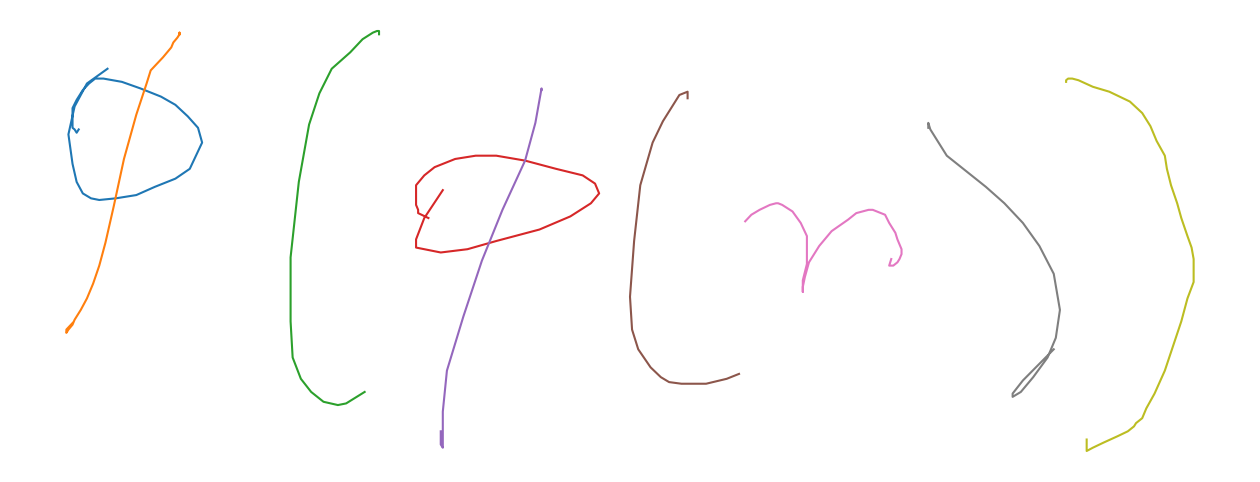

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MathOnlineModel.load_from_checkpoint('/content/epoch=9-val_wer=0.1221.ckpt')
model = model.to(device)
model.eval()

dataset = CROHME(annotation='/content/drive/MyDrive/CROHME2019/crohme2019_valid.txt', root_dir='/content/drive/MyDrive/CROHME2019/crohme2019', vocab=Vocab('crohme_vocab.txt'))

#print(len(dataset))
with open("output_logs.txt", "w") as f:
    for i in range(1):
            #Fetch the feature and label
            feature, label, input_len, label_len = dataset.__getitem__(i)
            feature = feature.to(device)  # Move feature to the same device as the model

            #Get the filename for visualization
            filename = dataset.ink_paths[i]  # Full path
            filename_only = os.path.basename(filename)  # Extract just the file name

            #Load and visualize the InkML file first
            ink = Inkml(filename)
            visualize_inkml(ink)

            #Initialize decoder
            greedy_decoder = GreedyCTCDecoder(vocab)

            #Run model forward pass
            output = model(feature.unsqueeze(0))  # Add batch dimension

            #Decode output
            decoded = greedy_decoder.forward(output.squeeze(0))  # Remove batch dimension
            decoded_str = " ".join(decoded)  # Convert list to string format

            #Print decoded output after visualization
            print(f"Decoded output for {filename_only}: {decoded_str}")
            f.write(f"Decoded output for {filename_only}: {decoded_str}")


In [39]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#Function to process an InkML file and return visualization and decoded output
def recognize(filename, model_path='/content/epoch=9-val_wer=0.1221.ckpt'):

    #Initialize device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    #Load the trained model
    model = MathOnlineModel.load_from_checkpoint(model_path)
    model = model.to(device)
    model.eval()

    #Initialize vocabulary and decoder
    vocab = Vocab('crohme_vocab.txt')
    greedy_decoder = GreedyCTCDecoder(vocab)

    #Read and process the InkML file
    try:
        ink = Inkml(filename)
        traces = ink.getTraces()
        traces = [remove_duplicate(trace) for trace in traces]  #Ensure no duplicate points
    except Exception as e:
        print(f"Error reading InkML file: {e}")
        return None

    #Visualize strokes
    path = '/content/' + filename
    ink = Inkml(path)
    visualize_inkml(ink)

    #Extract features
    feature = feature_extraction(traces)
    feature_tensor = torch.tensor(feature, dtype=torch.float).to(device)

    #Perform model inference
    output = model(feature_tensor.unsqueeze(0))  #Add batch dimension

    #Decode output
    decoded = greedy_decoder.forward(output.squeeze(0))
    decoded_expression = ' '.join([i for i in decoded])

    print(f"Decoded Expression: {decoded_expression}")
    return

Decoded Expression: 5 Right x Sup 2 NoRel + Right \int Right 2 Right y Right d Right y Right = Right 7 Right 2


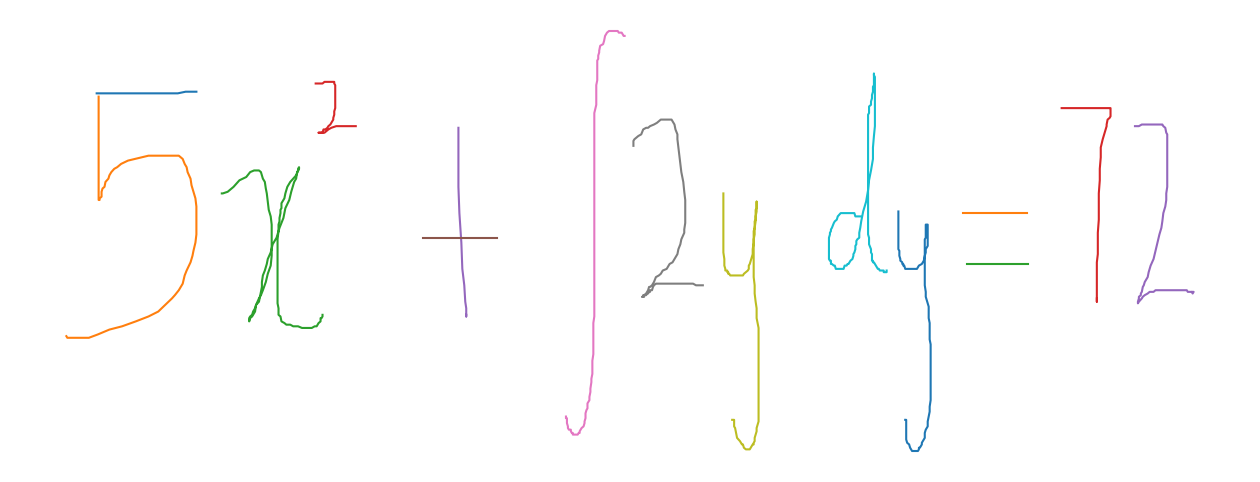

In [40]:
#Test individual file recognition

recognize('sample1.inkml')